In [12]:
# https://medium.com/towards-data-science/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

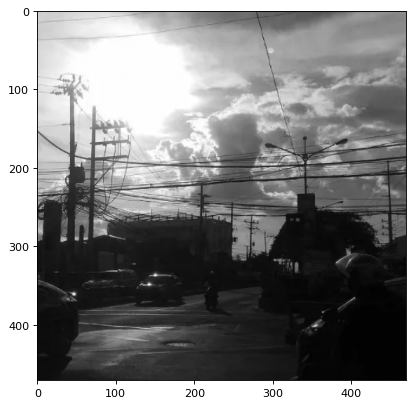

In [13]:
dark_image = imread('wires.png')
# Converte para escala de cinza se for uma imagem colorida RGB
if len(dark_image.shape) > 2:
  dark_image_grey = rgb2gray(dark_image)
else:
  dark_image_grey = dark_image

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

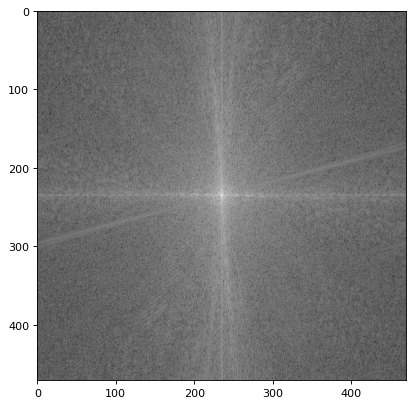

In [14]:
# Image Fourier
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

Na imagem, podemos ver duas distorções muito claras. As linhas brancas verticais e horizontais referem-se aos elementos horizontais e verticais nítidos da imagem. Vamos ver o que acontece se mascararmos um deles.

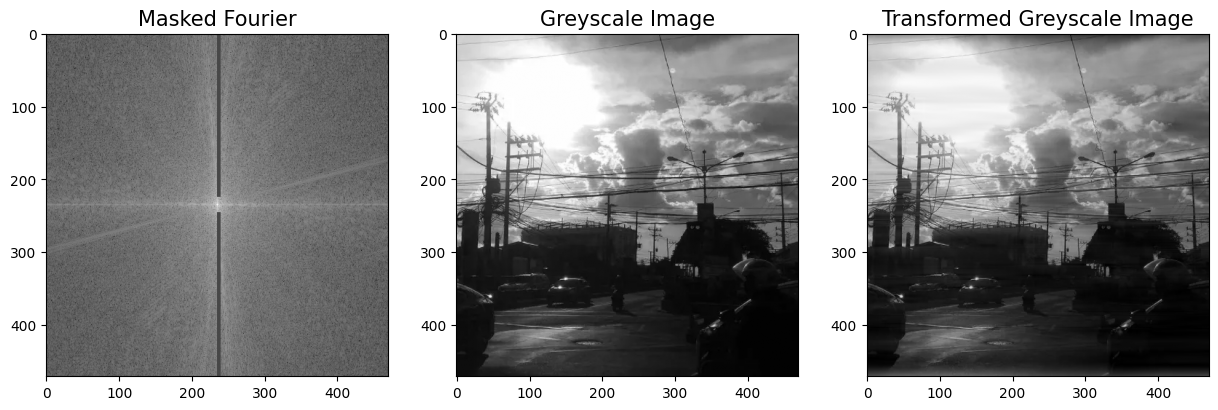

In [15]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier=np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)),
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image',
                     fontsize = f_size);

fourier_masker_ver(dark_image, 1)

Podemos ver que o tamanho dos cabos de energia horizontais foi significativamente reduzido. Como um experimento interessante, vamos ver o que aconteceria se, em vez disso, mascarássemos a linha horizontal.

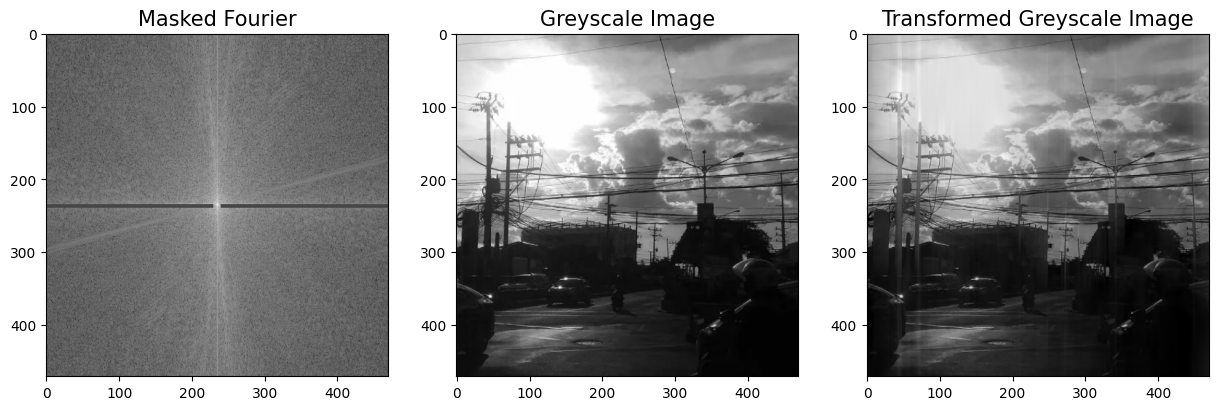

In [18]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier =  np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)),
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image',
                     fontsize = f_size);
fourier_masker_hor(dark_image, 1)

Podemos ver que todos os aspectos verticais da imagem foram borrados. Isso é altamente perceptível nos postes elétricos. Embora seja útil em algumas configurações, isso claramente não é útil neste caso.

Embora vamos nos limitar a mascarar a linha vertical da Transformação de Fourier (lembre-se novamente de que, quando convertida de volta para a imagem original, isso mancha as linhas horizontais), vamos experimentar diferentes graus de mascaramento.

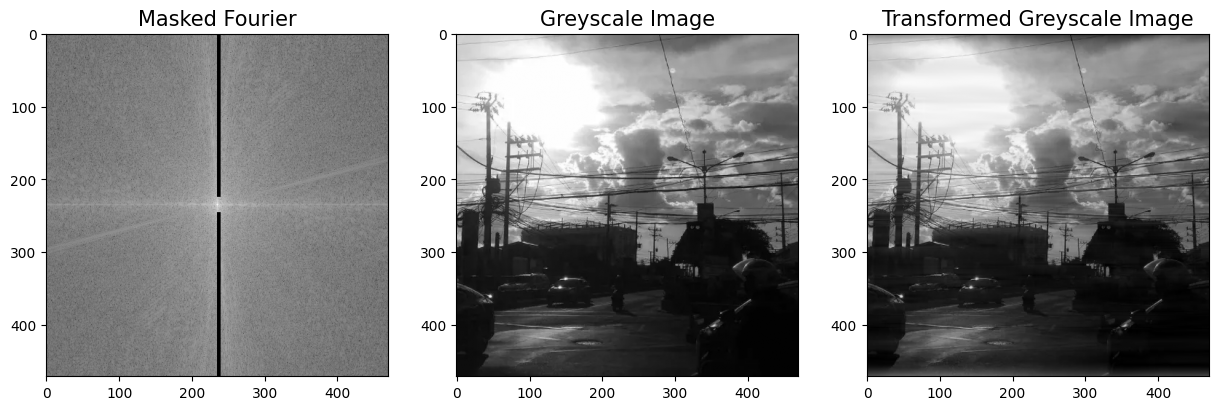

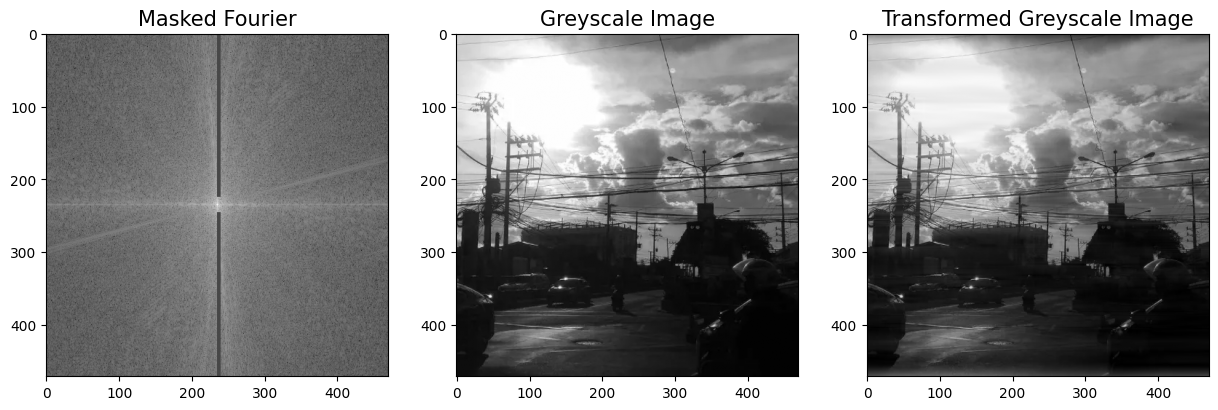

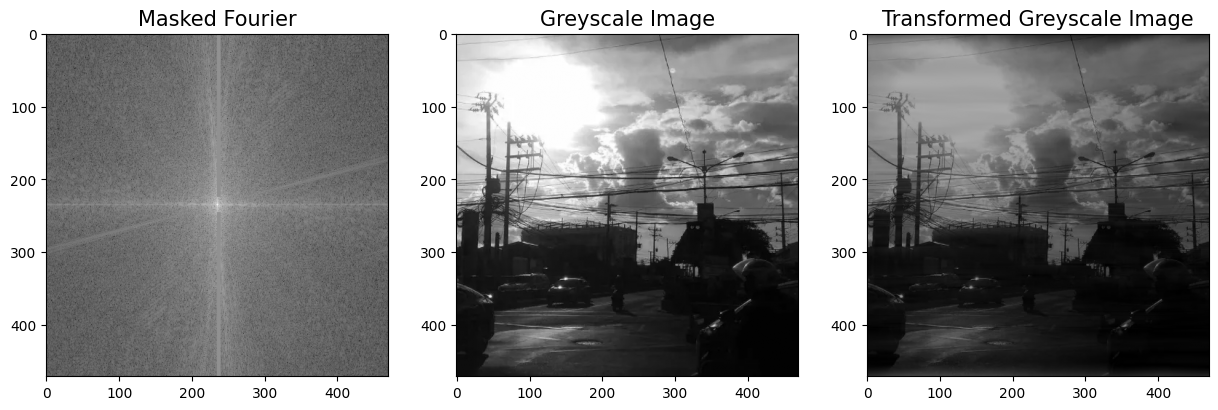

In [19]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image, i)

fourier_iterator(dark_image, [0.001, 1, 100])

Podemos ver que diminuir o valor quase não tem efeito sobre a imagem original, mas aumentar o valor parece escurecer a imagem original. Como não há praticamente nenhuma diferença entre o valor menor e 1, vamos nos ater a 1 para simplificar.

Por fim, vamos aplicar o ajuste da Transformação de Fourier e, ao mesmo tempo, manter as cores da imagem original.

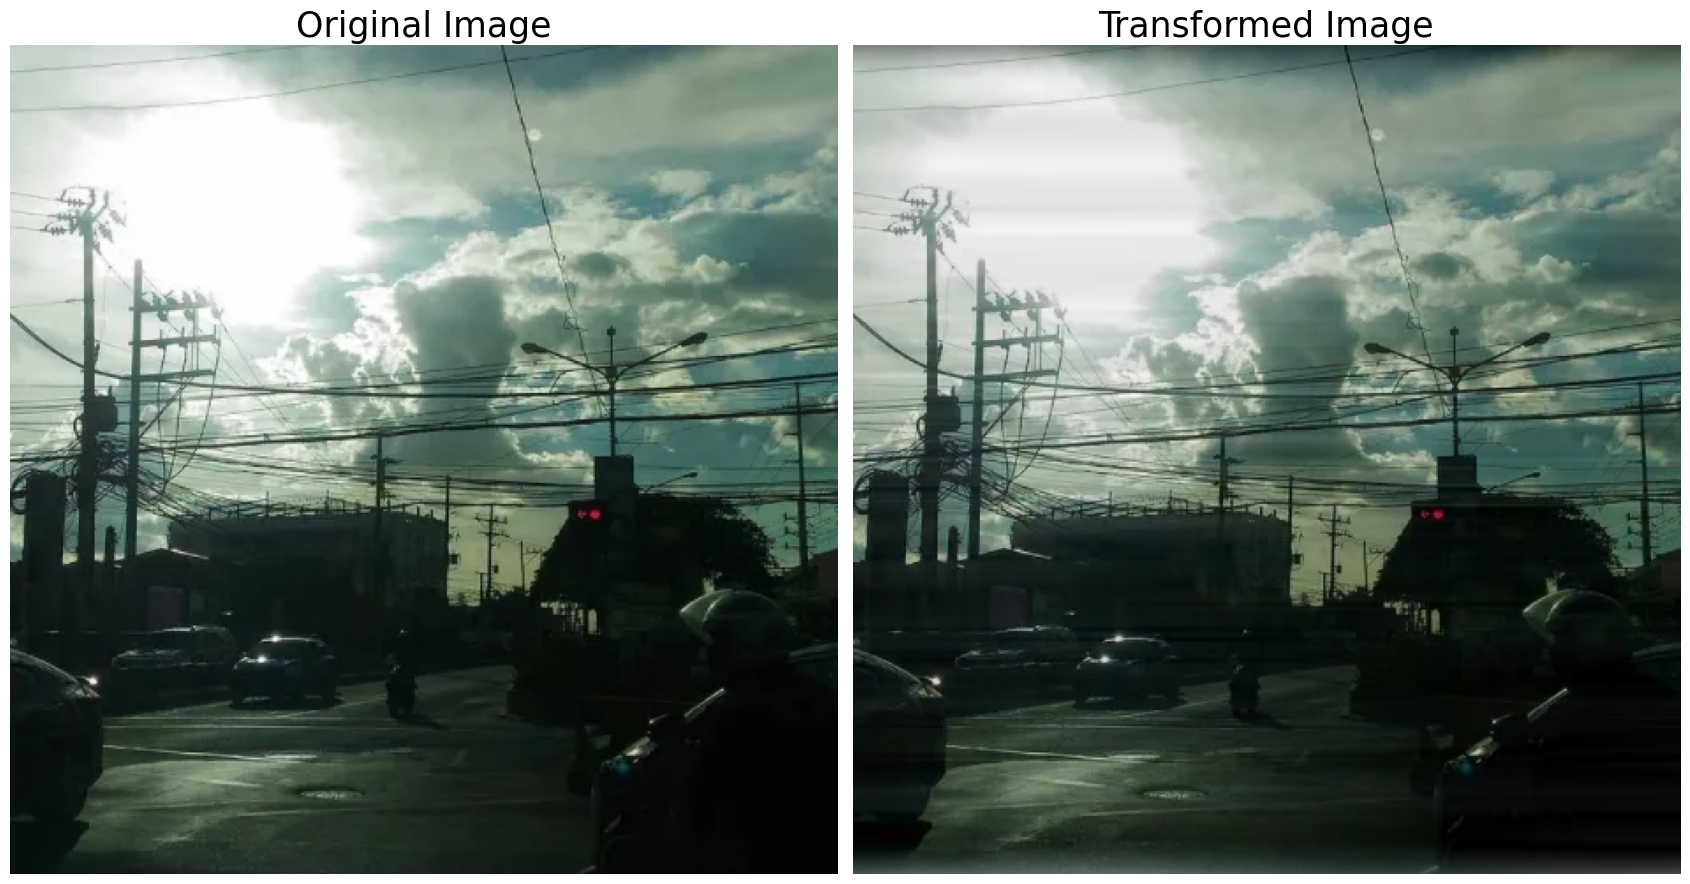

In [30]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))

    final_image = np.dstack([transformed_channels[0].astype(int),
                             transformed_channels[1].astype(int),
                             transformed_channels[2].astype(int)])

    # Normalizar os valores para o intervalo [0, 255]
    final_image = (final_image - final_image.min()) / (final_image.max() - final_image.min()) * 255
    final_image = final_image.astype(np.uint8)  # Converter para inteiros no intervalo [0, 255]


    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()

    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()

    fig.tight_layout()

fourier_transform_rgb(dark_image)

Podemos ver que os cabos de energia horizontais foram bastante reduzidos, enquanto o restante da imagem permanece praticamente intacto. Isso mostra como podemos fazer alterações sutis em uma imagem por meio da Transformação de Fourier.

Agora faça o mesmo usando o espaço de cor L*a*b*